### Demo how to use OLR-based MJO index from Kiladis et al 2014 with the DREAM model). 
### Part 2/2.


* stephanie.leroux@ocean-next.fr
* Last update: 1/04/2019.

#### Purpose: 
* This notebook is the part 2/2 of a demo how to  use  the Original OMI index proposed by Kiladis et al 2014 (see refs below) with the DREAM model
* Part 1/2 ([see here](https://nbviewer.jupyter.org/github/dream-gcm/dream-tools/blob/master/demo_py_notebooks/SLX_MakeNCfromMJO_OMI_EOFs.ipynb)) explained how to read the original txt file from the NOAA ftp and concatenate them in a netcdf file more convenient to read and process, which contains the pair of MJO EOFs for each of the 366 calendar/julian day. [See Part 1/2](https://nbviewer.jupyter.org/github/dream-gcm/dream-tools/blob/master/demo_py_notebooks/SLX_MakeNCfromMJO_OMI_EOFs.ipynb) for more details on the OOMI MJO index.
* This notebook (Part 2/2) now shows how to read this netcdf file and "customise" the patterns before using with the DREAM model.


In [1]:
# modules for dealing nicely with arrays and netcdf
import netCDF4 as nc
import pandas as pd
import os
import xarray as xr
import numpy as np

# third party module i use for resampling on the gaussian grid
# you can install it by running conda install -c conda-forge pyresample in your terminal
import pyresample


# modules for plot purposes
import cartopy.crs as ccrs
import cartopy.feature as ccf
import cartopy.util as ccu
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.colorbar as mcolorbar

# My custom module with plot tools
import utils_SLX_plots_dream as slx


# Only if using jupyter notebook. Otherwise, comment out.
%matplotlib inline 

## Settings

In [2]:
# input/output dir
diri='/Users/leroux/DATA/DREAM_DATA/OMI_EOFpatterns/'

# name of the output file:
fili = 'OMI_EOFs_allyear.nc'

# plot output
diro='/Users/leroux/Desktop/MJOplots/'

## Open and read data:

### Read with xarray:

In [3]:
EOF1 = xr.open_dataset(diri+fili,decode_times=True)['eof1']
EOF2 = xr.open_dataset(diri+fili,decode_times=True)['eof2']

### Quick look at what's in the array:

In [4]:
EOF1

<xarray.DataArray 'eof1' (time: 366, lat: 73, lon: 144)>
[3847392 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 -75.0 -72.5 ...
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 1980-01-03 ...
Attributes:
    long_name:  EOF1 (OMI)

In [5]:
EOF2

<xarray.DataArray 'eof2' (time: 366, lat: 73, lon: 144)>
[3847392 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 -75.0 -72.5 ...
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 1980-01-03 ...
Attributes:
    long_name:  EOF2 (OMI)

### Quick plot of the pair of patterns for a given day:

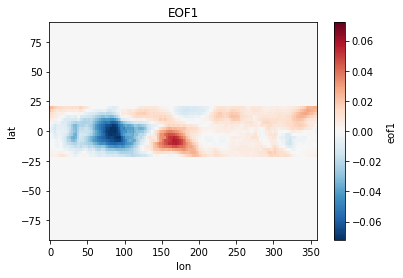

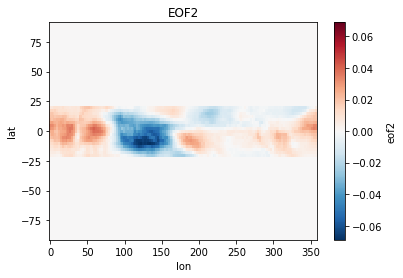

In [6]:
EOF1.sel(time='1980-04-01').plot()
plt.title('EOF1')
plt.show()

EOF2.sel(time='1980-04-01').plot()
plt.title('EOF2')
plt.show()

## Nicer plot of the pair of EOFs for a given day in year

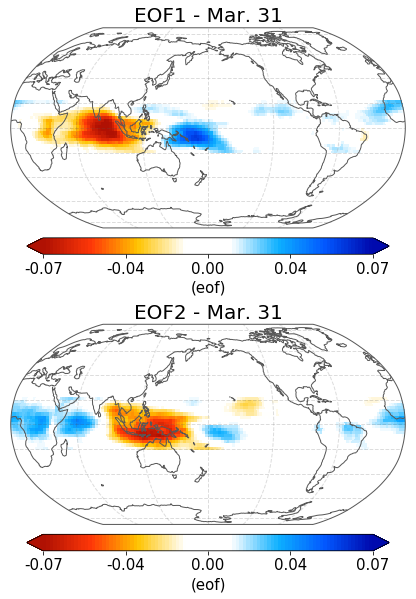

In [7]:
#----------------------------------------------------
#------ PLOT PARAMETERS------------------------------
#----------------------------------------------------

#------------ geography
# Global plot? True/False
glo= True

# center longitude on:
loncentr=180.

# set coastL to True if you want coaslines
coastL=True

#------------ color shading

# type of plot (can be 'contourf', 'pcolormesh', defaut is contourf)
typlo='pcolormesh'

# min max values on the colorscale
vmin=-0.07
vmax=0.07

# colormap
cm_base=slx.make_SLXcolormap(whichco='MJO')

# number of color segments of the colormap
Nincr=100

# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'
 

# number of labels on the colorbar
Nbar=5

#------------ plot output
# plot format
pltty = ".png"

# plot resolution (dpi)
dpifig=300

# base name for output plot file
plti="OMIEOFs"


# pick up one example day (in 1-366)
it=90

# output plot file name including the time index
plto = plti+"."+str(it+100)


# data to plot 
# here we select one timestep for plotting purposes
data2plot  = EOF1.isel(time=it)
data2plot2  = EOF2.isel(time=it)

# colorbar label 
labelplt='(eof)'

# make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
# EOF1
cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot.values,data2plot.lon.values)
# EOF2
cyclic_data2, cyclic_lons = ccu.add_cyclic_point(data2plot2.values,data2plot2.lon.values)


#----------------------------------------------------
#------ PLOT ----------------------------------------
#----------------------------------------------------

# create fig
fig1 = plt.figure(figsize=([13,10]),facecolor='white')


# plot data (base plot from plotmap functionn defined above)
cs1 = slx.plotmap(fig1,cyclic_data,cyclic_lons,data2plot.lat.values,plto,subplt=[2,1,1],cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt,scattcmap=True)

# add title on plot (date)
plt.title('EOF1 - '+slx.printdayinyear(EOF1.time.to_index(),it),size=20)


# plot data (base plot from plotmap functionn defined above)
ax = slx.plotmap(fig1,cyclic_data2,cyclic_lons,data2plot2.lat.values,plto,subplt=[2,1,2],cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt,scattcmap=True)

# add title on plot (date)
plt.title('EOF2 - '+slx.printdayinyear(EOF1.time.to_index(),it),size=20)

plt.show()

# Save fig in png, resolution dpi
fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig1)   

## Now loop on the 366 days to make a movie:

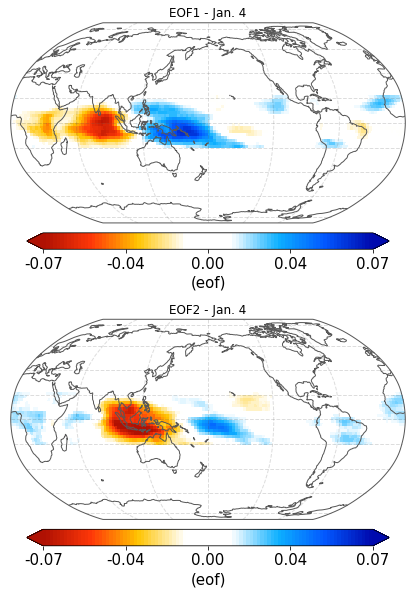

In [9]:
#----------------------------------------------------
#------ PLOT PARAMETERS------------------------------
#----------------------------------------------------

#------------ geography
# Global plot? True/False
glo= True

# center longitude on:
loncentr=180.

# set coastL to True if you want coaslines
coastL=True

#------------ color shading

# type of plot (can be 'contourf', 'pcolormesh', defaut is contourf)
typlo='pcolormesh'

# min max values on the colorscale
vmin=-0.07
vmax=0.07

# colormap
cm_base=slx.make_SLXcolormap(whichco='MJO')

# number of color segments of the colormap
Nincr=100

# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'
 

# number of labels on the colorbar
Nbar=5

#------------ plot output
# plot format
pltty = ".png"

# plot resolution (dpi)
dpifig=300

# base name for output plot file
plti="OMIEOFs"


# loop on the 366 days
for it in range(0,366):

        # output plot file name including the time index
        plto = plti+"."+str(it+1001)


        # data to plot (must be a 2-d np.array)
        # here we select one timestep at a time for plotting purposes
        data2plot  = EOF1.isel(time=it)
        data2plot2  = EOF2.isel(time=it)

        # colorbar label 
        labelplt='(eof)'

        # make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
        # EOF1
        cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot.values,data2plot.lon.values)
        # EOF2
        cyclic_data2, cyclic_lons = ccu.add_cyclic_point(data2plot2.values,data2plot2.lon.values)


        #----------------------------------------------------
        #------ PLOT ----------------------------------------
        #----------------------------------------------------

        # create fig
        fig1 = plt.figure(figsize=([13,10]),facecolor='white')


        # plot data (base plot from plotmap functionn defined above)
        cs = slx.plotmap(fig1,cyclic_data,cyclic_lons,data2plot.lat.values,plto,subplt=[2,1,1],cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

        # add title on plot (date)
        plt.title('EOF1 - '+slx.printdayinyear(EOF1.time.to_index(),it))


        # plot data (base plot from plotmap functionn defined above)
        cs = slx.plotmap(fig1,cyclic_data2,cyclic_lons,data2plot2.lat.values,plto,subplt=[2,1,2],cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

        # add title on plot (date)
        plt.title('EOF2 - '+slx.printdayinyear(EOF1.time.to_index(),it))



        if it==3:
        # display plot only once in the loop
            plt.show()

        # Save fig in png, resolution dpi
        fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

        # close fig
        plt.close(fig1)   

## ___

## Example how to mask the "spurious" MJO signals from EOF1 pattern at a given day in winter

* select a given day in EOF1

In [ ]:
it=100
temp = EOF1.isel(time=it)

* 1: Keep only MJO anoms between longitude 47.5 and 215, otherwise set to zero (it eliminates signals in the eastern pac and in the atlantic but keeps africa)

In [ ]:
select1= temp.where((temp.lon>0)&(temp.lon<215),other=0.)   

* 2: Now starting from above, eliminates the remaining  small spot of negative values in the middle of the pacific jsu south of the Eq

In [ ]:
select2=select1.where((select1.lon<150)|((select1.lon>=150)&(select1>0)),other=0)

* 3: Now starting from above, eliminates the remaining positive signal over africa while keeping the negative signal.

In [ ]:
select3=select2.where((select2.lon>60)|((select2.lon<=60)&(select2<0)),other=0)

* Plot original pattern and then after "cleaning"

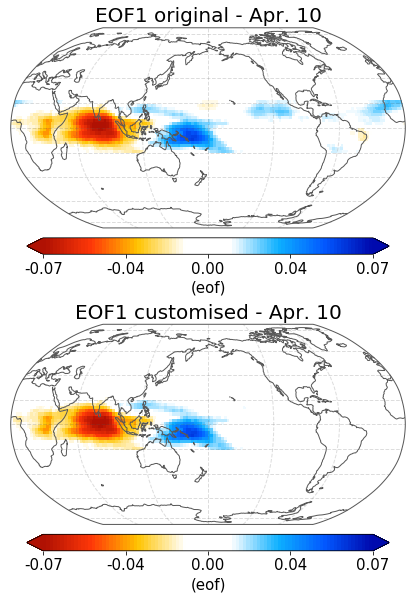

In [23]:
#----------------------------------------------------
#------ PLOT PARAMETERS------------------------------
#----------------------------------------------------

#------------ geography
# Global plot? True/False
glo= True

# center longitude on:
loncentr=180.

# set coastL to True if you want coaslines
coastL=True

#------------ color shading

# type of plot (can be 'contourf', 'pcolormesh', defaut is contourf)
typlo='pcolormesh'

# min max values on the colorscale
vmin=-0.07
vmax=0.07

# colormap
cm_base=slx.make_SLXcolormap(whichco='MJO')

# number of color segments of the colormap
Nincr=100

# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'
 

# number of labels on the colorbar
Nbar=5

#------------ plot output
# plot format
pltty = ".png"

# plot resolution (dpi)
dpifig=300

# base name for output plot file
plti="OMIEOFs_cleaningexample"


# output plot file name including the time index
plto = plti+"."+str(it+100)


# data to plot (must be a 2-d np.array)
# here we select one timestep at a time for plotting purposes
data2plot  = temp
data2plot2  = select3

# colorbar label 
labelplt='(eof)'

# make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
# EOF1
cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot.values,data2plot.lon.values)
# EOF2
cyclic_data2, cyclic_lons = ccu.add_cyclic_point(data2plot2.values,data2plot2.lon.values)


#----------------------------------------------------
#------ PLOT ----------------------------------------
#----------------------------------------------------

# create fig
fig1 = plt.figure(figsize=([13,10]),facecolor='white')


# plot data (base plot from plotmap functionn defined above)
cs1 = slx.plotmap(fig1,cyclic_data,cyclic_lons,data2plot.lat.values,plto,subplt=[2,1,1],cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt,scattcmap=True)

# add title on plot (date)
plt.title('EOF1 original - '+slx.printdayinyear(EOF1.time.to_index(),it),size=20)


# plot data (base plot from plotmap functionn defined above)
ax = slx.plotmap(fig1,cyclic_data2,cyclic_lons,data2plot2.lat.values,plto,subplt=[2,1,2],cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt,scattcmap=True)

# add title on plot (date)
plt.title('EOF1 customised - '+slx.printdayinyear(EOF1.time.to_index(),it),size=20)




#if it==3:
# display plot only once in the loop
plt.show()

# Save fig in png, resolution dpi
fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#

# close fig
plt.close(fig1) 

# Things left to discuss and decide:

#### Cleaning:
* The  "cleaning" process like in the example above has to be defined carefully in a way that it applies to all the 366 daily patterns for each EOF (bearing in mind that from winter to summer, the patterns are quite different). See the video.  

#### How to use these EOF pairs with DREAM?
* For perpetual runs and an idealized MJO perturbation:  Probably good to average the EOF patterns over the given season (DJF, JJA, etc), then clean the average pattern, then apply in the model as a combination like :

``` MJO_perturbation1(it,x,y) = EOF1_season_cleaned(x,y) * cos(2pi*it/T) + EOF2_season_cleaned(x,y) * sin(2pi*it/T)``` with a choosen T of  ~40 days for example.

In that case, i can either produce an output file of the sequence MJO_perturbation(it,x,y) with a total length to be defined (30 years, one year, etc.) or just produce EOF1_season_cleaned(x,y) and EOF2_season_cleaned(x,y) and you do the combination directly in the model.


* For GCM runs with annual cycle, we should do :

``` MJO_perturbation2(it,x,y) = EOF1_cleaned(it_dayofyear,x,y) * cos(2pi*it/T) + EOF2_cleaned(it_dayofyear,x,y) * sin(2pi*it/T)```  where ```EOF1_cleaned(it_dayofyear,x,y)``` is the EOF pattern for the dayof year corresponding to ```it```. This is pretty easy to do in python but im guessing that it might be a little mnore annoying to do in fortran.

Or else we could also use a sequence of the real PCs from the NOAA website for a time where we know there is a nice MJO event going on and use this sequence in the model (like a case-study perturbation:

``` MJO_perturbation3(it,x,y) = EOF1_cleaned(it_dayofyear,x,y) * PC1_NOAA(it) + EOF2_cleaned(it_dayofyear,x,y) * PC2_NOAA(it)```


#### Output format
* I already have a code ready for the other aspects of the final outputs (i mean convert to gaussian grid T31 or T42 in the same format as ncep2 and write a netcdf file), so it'll be easy to produce the final file(s) once you've decided which option(s) from above you need. 